In [2]:
#!mkdir new_folder

In [3]:
# For NLP & Preprocessing

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from wordcloud import WordCloud,STOPWORDS #Better stopwords here
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
import pandas as pd 
import numpy as np
import re
import numpy
import email
import warnings
warnings.filterwarnings('ignore')

#Visualizations
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

#Setting Dark Theme
sns.set(rc={'figure.figsize':(10,6.18)})
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")


In [5]:
df = pd.read_csv('emails.csv')
df

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [6]:
df.info() #No null values are visible

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48076 non-null  int64 
 1   filename    48076 non-null  object
 2   Message-ID  48076 non-null  object
 3   content     48076 non-null  object
 4   Class       48076 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [7]:
df.describe()
#notice that there are atually 24k values only for content whereas the rest are duplicated

,Unnamed: 0
count,48076.000000
mean,24037.500000
std,13878.490108
min,0.000000
25%,12018.750000
50%,24037.500000
75%,36056.250000
max,48075.000000


In [8]:
df = pd.DataFrame(df)
df.drop(df.columns[[0, 2]], axis=1, inplace=True)
df
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['label'] = le.fit_transform(df['Class'])

In [9]:
df

,filename,content,Class,label
0,arnold-j/_sent_mail/34.,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,0
1,arnold-j/_sent_mail/517.,fuck you,Abusive,0
2,arnold-j/_sent_mail/743.,Gentlemen:\nThe following champagne is availab...,Abusive,0
3,arnold-j/_sent_mail/766.,sorry i've taken so long...just been trying to...,Abusive,0
4,arnold-j/_sent_mail/797.,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,0
...,...,...,...,...
48071,campbell-l/notes_inbox/133.,"Dear Market Participants,\n\nPlease note the c...",Non Abusive,1
48072,campbell-l/notes_inbox/134.,"According to my fancy ciphering we made $310,0...",Non Abusive,1
48073,campbell-l/notes_inbox/135.,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive,1
48074,campbell-l/notes_inbox/136.,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive,1


In [10]:
df['label'].value_counts()

1    44666
0     3410
Name: label, dtype: int64

In [11]:
df['content']

0        eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...
1                                                 fuck you
2        Gentlemen:\nThe following champagne is availab...
3        sorry i've taken so long...just been trying to...
4        asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...
                               ...                        
48071    Dear Market Participants,\n\nPlease note the c...
48072    According to my fancy ciphering we made $310,0...
48073    BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...
48074    Welcome to: DIAMONDS NEWSLETTER         Issue:...
48075    ---------------------- Forwarded by Tamara Jae...
Name: content, Length: 48076, dtype: object

In [12]:
# Adding text-length as a field in the dataset
df['text length'] = df['content'].apply(len)
print(df.head(10))

                       filename  \
0       arnold-j/_sent_mail/34.   
1      arnold-j/_sent_mail/517.   
2      arnold-j/_sent_mail/743.   
3      arnold-j/_sent_mail/766.   
4      arnold-j/_sent_mail/797.   
5      arnold-j/_sent_mail/798.   
6       arnold-j/_sent_mail/81.   
7  arnold-j/all_documents/1005.   
8  arnold-j/all_documents/1037.   
9  arnold-j/all_documents/1038.   

                                             content    Class  label  \
0  eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...  Abusive      0   
1                                           fuck you  Abusive      0   
2  Gentlemen:\nThe following champagne is availab...  Abusive      0   
3  sorry i've taken so long...just been trying to...  Abusive      0   
4  asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...  Abusive      0   
5  asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/24...  Abusive      0   
6  Do you know my hr rep's name?\n\n\n\nJennifer ...  Abusive      0   
7  sorry i've taken so long...just bee

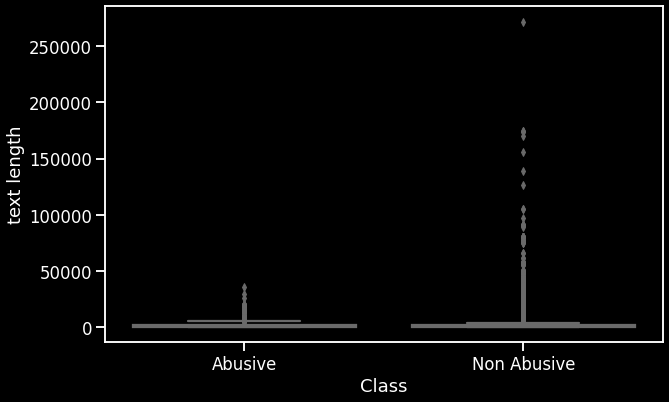

In [13]:
# Box-plot visvualization
sns.boxplot(x='Class', y='text length', data=df)

In [14]:
def employee(filename):
    column = []
    for string in filename:
        column.append(string.split("/")[0])
    return column

df['employee'] = employee(df['filename'])
df.head(3)

,filename,content,Class,label,text length,employee
0,arnold-j/_sent_mail/34.,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,0,220,arnold-j
1,arnold-j/_sent_mail/517.,fuck you,Abusive,0,8,arnold-j
2,arnold-j/_sent_mail/743.,Gentlemen:\nThe following champagne is availab...,Abusive,0,612,arnold-j


In [15]:
top_20 = pd.DataFrame(df['employee'].value_counts()[:20])
top_20.reset_index(inplace=True)
top_20.columns = ["Employee_name", "Counts"]
top_20

,Employee_name,Counts
0,beck-s,11830
1,bass-e,7823
2,campbell-l,5021
3,arnold-j,4898
4,blair-l,3415
5,allen-p,3034
6,baughman-d,2760
7,buy-r,2429
8,brawner-s,1026
9,badeer-r,877


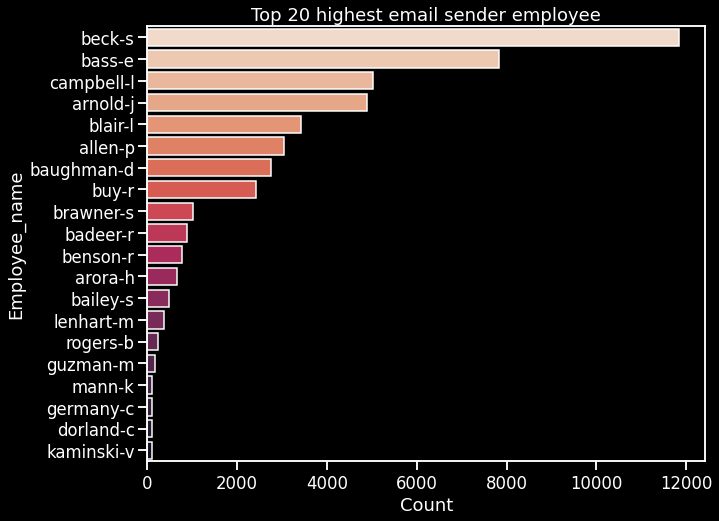

In [16]:
plt.figure(figsize=(10,8))

sns.barplot(y="Employee_name", x="Counts", data=top_20, palette="rocket_r")
plt.title("Top 20 highest email sender employee")
plt.xlabel("Count")
plt.ylabel("Employee_name")
plt.show()

In [17]:
df.isnull().sum()

filename       0
content        0
Class          0
label          0
text length    0
employee       0
dtype: int64

In [18]:
# No of unique values under every column
df.nunique() 

filename       48076
content        24656
Class              2
label              2
text length     5306
employee         142
dtype: int64

In [19]:
df.drop(['filename','employee','text length'],axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.shape

(24656, 3)

In [20]:
df.reset_index()
df.head()

,content,Class,label
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,0
1,fuck you,Abusive,0
2,Gentlemen:\nThe following champagne is availab...,Abusive,0
3,sorry i've taken so long...just been trying to...,Abusive,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,0


In [21]:
df['content'][2]

"Gentlemen:\nThe following champagne is available at 70% of approximate retail price. Also \nhave interest in trading for red wine.  Retail prices derived from Spec's \nwebsite or Winesearcer.com.  Wine has been stored at temperature controlled \nprivate wine storage facility.\n\n\nQuan      Vintage  Wine         Retail\n3  1990  Perrier Jouet Brut Fleur de Champagne  110 \n1  1988  Piper Heidsek Reserve    65 \n2  1990  Dom Perignon     125\n1  1990  Veuve Cliquot Ponsardin La Grande Dame 100\n1  1988  Taittenger Millesine Brut    85 \n1  1992  Jacquart Millesine    29\n3  1990  Roederer Cristal     200\n\nAny interest??"

In [22]:
[s.strip() for s in df['content'][3].splitlines()]

["sorry i've taken so long...just been trying to fend off the chicks.   life is",
 'sooooo hard sometimes.',
 '',
 '',
 '',
 'MONKEY !!!!!!!!!!!!!!!!!',
 '',
 '',
 "From: Brian O'Rourke@excelr COMMUNICATIONS on 01/04/2001 10:04 AM",
 'To: John Arnold/HOU/ECT@ECT',
 'cc:',
 'Subject: Yeah Monkey!!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '',
 'Monkey;',
 '',
 'Hey you little bastard, what the fuck are you doing in a picture in',
 'E-Company???  What, do you think that should help you score women.  How do',
 'you say BALANCE SHEET!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '',
 'Yeah Monkey,',
 '',
 'B',
 '']

In [23]:
df.dropna(inplace=True) #To remove the webscrapped from original csv file

# Feature Analysis

In [24]:
df.rename({'content':'text','Class':'target'},axis=1,inplace=True) #Renaming for easier use
df.head()

,text,target,label
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,0
1,fuck you,Abusive,0
2,Gentlemen:\nThe following champagne is availab...,Abusive,0
3,sorry i've taken so long...just been trying to...,Abusive,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,0


In [25]:
#Percentage counts
df.target.value_counts(normalize=True) 

Non Abusive    0.933404
Abusive        0.066596
Name: target, dtype: float64

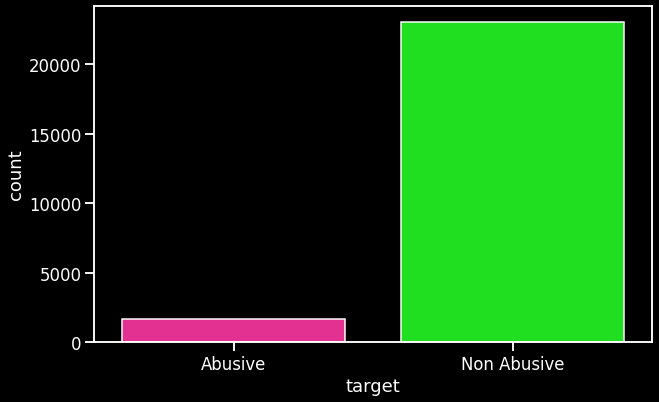

In [26]:
sns.countplot(df.target, palette=["deeppink","lime"])
#Biased Distribution of Target

In [27]:
text_len=[len(x) for x in df.text]
#text_len

In [28]:
outlier = [y for y in text_len if y > 1000]
len(outlier)

10023

In [29]:
df.length = df.text.apply(lambda x : len(x))

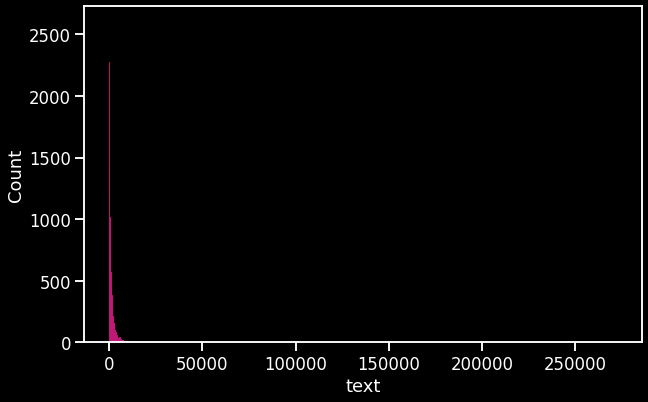

In [30]:
sns.histplot(df.length, color='deeppink')

# Preprocessing


In [31]:
# Make a different Dataset
df1 = df.copy()
df1.head()

,text,target,label
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,0
1,fuck you,Abusive,0
2,Gentlemen:\nThe following champagne is availab...,Abusive,0
3,sorry i've taken so long...just been trying to...,Abusive,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,0


In [32]:
#Before cleaning
df1.text.head()

0    eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...
1                                             fuck you
2    Gentlemen:\nThe following champagne is availab...
3    sorry i've taken so long...just been trying to...
4    asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...
Name: text, dtype: object

In [33]:
# Clean The Data using RegEx
#result = re.sub(pattern, replacement, string, count=0, flags=0)

def cleantext(text):
    text = re.sub(r'[A-Za-z0-9]*@[A-Za-z]*\.?[A-Za-z0-9]*', "", text) #remove mail ids
    text = re.sub(r"\n", " ", text) #remove next "\n"
    text = re.sub(r"[\d-]", "", text) #remove all digits 
    text = re.sub(r"\t"," ",text)
    text = re.sub(r"\r"," ",text)
    text = re.sub(r"-"," ", text) #To remove ---in text
    text = re.sub(r'<.*?>'," ",text) #to remove html links
    text = re.sub(r'<img.*?/>'," ",text) #to remove Image tags
    text = re.sub(r'[^A-Za-z0-9]+', " ", text) #remove all special charcters
   
    text = text.lower()
    return text

#Apply to our dataset
df1.text = df1.text.apply(cleantext)
df1.text.head()


0    eat shit john j pm to john arnold hou cc subje...
1                                             fuck you
2    gentlemen the following champagne is available...
3    sorry i ve taken so long just been trying to f...
4    asshole john j am to john arnold hou cc subjec...
Name: text, dtype: object

In [34]:
df1.text.tail()

47974     do you need new leads for your business do yo...
47975     image image image garth brooks wrapped up in ...
47977     image image image dear smartreminders member ...
47980     image image image image kid rock forever imag...
47981     you received this email because you registere...
Name: text, dtype: object

In [35]:
 def cleantext(text):
     text = text.replace("image", " ") #removing image Attachments 
     return text
     #Apply to our dataset
df1.text = df1.text.apply(cleantext)
df1.text.tail()

47974     do you need new leads for your business do yo...
47975           garth brooks wrapped up in you     win ...
47977           dear smartreminders member   franchoice...
47980             kid rock forever   official kid rock ...
47981     you received this email because you registere...
Name: text, dtype: object

# ***Freq. of Words, Custom Stop Word Removal & Word Cloud***

---




In [36]:
#making a corpus of the dataset
review_str = ' '.join(df1.text.tolist())

In [37]:
text = review_str
words = text.split()
fdsit1 = FreqDist(words)
print(fdsit1)
print(fdsit1.most_common(100))

#Words which are not in inbuilt stopwords are noted

<FreqDist with 96773 samples and 5748144 outcomes>
[('the', 229824), ('to', 170051), ('and', 111455), ('of', 91818), ('a', 91140), ('in', 72232), ('for', 65799), ('you', 63788), ('i', 55833), ('on', 52860), ('is', 52333), ('s', 48113), ('that', 44515), ('this', 42436), ('from', 37624), ('be', 37079), ('with', 34644), ('will', 33803), ('we', 32469), ('at', 31924), ('have', 31308), ('it', 29255), ('are', 29004), ('your', 27326), ('as', 27023), ('excelr', 26347), ('or', 26312), ('by', 23608), ('com', 23291), ('if', 22968), ('not', 21881), ('hou', 20027), ('subject', 18489), ('am', 17677), ('pm', 17415), ('please', 16963), ('all', 15923), ('http', 15892), ('t', 15267), ('an', 14891), ('he', 14874), ('was', 14723), ('can', 14472), ('has', 13952), ('email', 13759), ('our', 13635), ('me', 13503), ('d', 13042), ('would', 12818), ('any', 12802), ('message', 12755), ('but', 12751), ('time', 12434), ('new', 11935), ('sent', 11772), ('no', 11015), ('they', 10868), ('m', 10794), ('up', 10783), ('ww

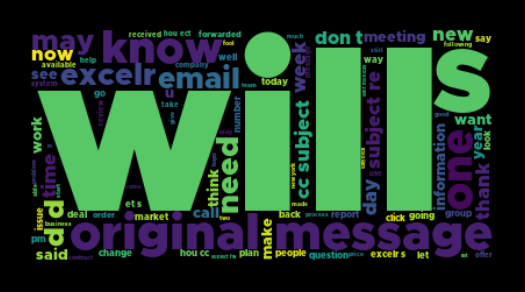

In [38]:
#Creating a WordCloud1
font_path = '/content/Metropolis-Black.otf'
wordcloud_ip = WordCloud(background_color="black", max_words=500,font_path=font_path,
               stopwords=STOPWORDS, max_font_size=200,
               random_state=42).generate(review_str)
figure(figsize=(2,3), dpi=300)
plt.imshow(wordcloud_ip,interpolation="bilinear")
plt.axis("off")
plt.show()

In [39]:
# Custom Stop Words list
# We made a custom stopwords set specific to our current dataset
with open("/content/custom_stopwords.txt","r") as stop:
  custom_stop = set(stop.read().split("\n"))

In [40]:
# We can create a new stopwords list by mergeing WordCLoud's STOPWORDS and our custom_stop
custom_stop = custom_stop.union(STOPWORDS)
len(custom_stop)

751

In [41]:
df1.text = df1.text.apply(lambda x: ' '.join([word for word in x.split() if word not in custom_stop]))
df1.text

0        eat shit bets minn buff phil indi cinnci det c...
1                                                     fuck
2        gentlemen champagne approximate retail interes...
3        long fend chicks life sooooo hard monkey brian...
4               asshole gambling problem bills denver jack
                               ...                        
47974    leads increased internet exposure thousands jo...
47975    garth brooks wrapped win tickets trip garth br...
47977    dear smartreminders member franchoice oneonone...
47980    kid rock forever official kid rock kidrock coc...
47981    registered trade web partners sites partner of...
Name: text, Length: 24656, dtype: object

In [42]:
#making a corpus of the dataset after custom stop word removal
review_str_2 = ' '.join(df1.text.tolist())

In [43]:
#Checking Freq Distribution for new corpus
text = review_str_2
words = text.split()
fdsit2 = FreqDist(words)
print(fdsit2)
print(fdsit2.most_common(100))

<FreqDist with 96092 samples and 2378063 outcomes>
[('click', 5195), ('today', 4895), ('buy', 4729), ('report', 4557), ('good', 4374), ('news', 3624), ('home', 3614), ('rick', 3580), ('deal', 3509), ('people', 3384), ('mark', 3179), ('number', 3143), ('great', 3090), ('start', 3055), ('order', 2992), ('offer', 2958), ('change', 2940), ('find', 2849), ('forward', 2779), ('give', 2763), ('fool', 2680), ('online', 2665), ('final', 2602), ('phtml', 2598), ('issues', 2591), ('working', 2586), ('description', 2584), ('stock', 2542), ('request', 2511), ('made', 2503), ('end', 2465), ('play', 2438), ('provide', 2425), ('plan', 2422), ('address', 2401), ('phone', 2395), ('support', 2360), ('million', 2353), ('details', 2321), ('fantasy', 2310), ('visit', 2294), ('years', 2294), ('contract', 2279), ('center', 2273), ('view', 2252), ('points', 2232), ('york', 2230), ('check', 2194), ('companies', 2170), ('wr', 2169), ('jones', 2138), ('trade', 2136), ('blair', 2135), ('state', 2093), ('long', 207

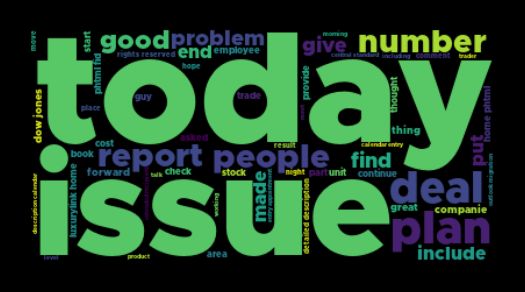

In [44]:
#Creating a WordCloud2
font_path = '/content/Metropolis-Black.otf'
wordcloud_ip = WordCloud(
                      background_color="black", max_words=500,font_path=font_path,
               stopwords=STOPWORDS, max_font_size=200,
               random_state=42).generate(review_str_2)
figure(figsize=(2,3), dpi=300)
plt.imshow(wordcloud_ip,interpolation="bilinear")
plt.axis("off")
plt.show()
#We have removed high frequency useless words from the dataset
#The words below are low frequency words


# ***Chat words abbrevation replacements***

---



In [45]:
# Custom Stop Words list
# We made a custom stopwords set specific to our current dataset
with open("/content/chat_Abbreviation.txt","r") as stop:
  chat_words = list(stop.read().split("\n"))

In [46]:
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words:
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

df1.text = df1.text.apply(lambda text: chat_words_conversion(text))

# Removing records that exceed word limit
We have a large frequency of texts between 0 to 500 range. Rest of the texts are just outliers and do not add any value to our overall modelling. Email Texts with excessive words make it difficult due to large number of features.

In [47]:
df1["length"] = df1.text.apply(lambda x : len(x))


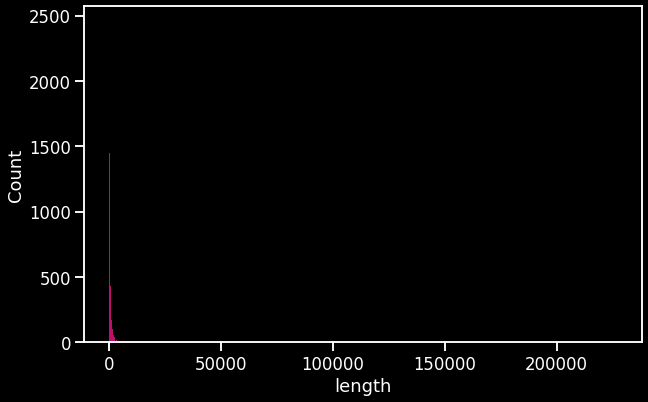

In [48]:
sns.histplot(df1.length, color='deeppink') #huge outliers must be removed

In [49]:
df1.target.loc[df1.length>1500].value_counts() 
#We could remove these to ease the modelling process.
#There is dataleak here since we are loosing some of the data but we are gaining an advantage in modelling.
# We will drop these outliers

Non Abusive    2332
Abusive         214
Name: target, dtype: int64

In [50]:
df2 = df1.loc[df1.length<1500].copy() #Make a dataset copy
df2.head()

,text,target,label,length
0,eat shit bets minn buff phil indi cinnci det c...,Abusive,0,63
1,fuck,Abusive,0,4
2,gentlemen champagne approximate retail interes...,Abusive,0,369
3,long fend chicks life sooooo hard monkey brian...,Abusive,0,133
4,asshole gambling problem bills denver jack,Abusive,0,42


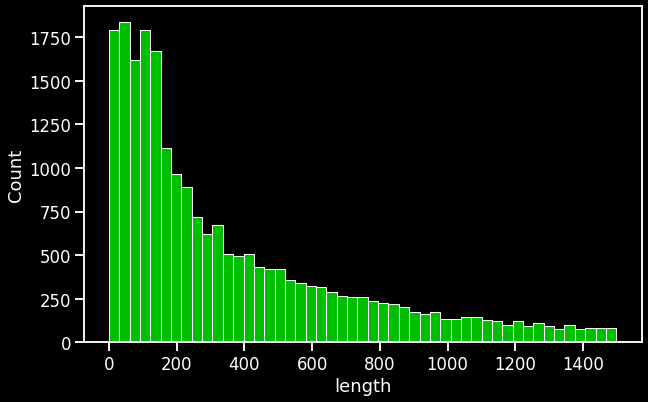

In [51]:
sns.histplot(df2.length, color='lime') #Outliers have been removed

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22108 entries, 0 to 47980
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    22108 non-null  object
 1   target  22108 non-null  object
 2   label   22108 non-null  int64 
 3   length  22108 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 863.6+ KB


# Lemmatization

In [53]:
df2.text.tail()

47973    writes nyiso tech exchange discussion nyiso re...
47974    leads increased internet exposure thousands jo...
47975    garth brooks wrapped win tickets trip garth br...
47977    dear smartreminders member franchoice oneonone...
47980    kid rock forever official kid rock kidrock coc...
Name: text, dtype: object

In [54]:
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df2.text = df2.text.apply(lambda text: lemmatize_words(text))
df2.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,text,target,label,length
0,eat shit bet minn buff phil indi cinnci det cl...,Abusive,0,63
1,fuck,Abusive,0,4
2,gentleman champagne approximate retail interes...,Abusive,0,369
3,long fend chick life sooooo hard monkey brian ...,Abusive,0,133
4,asshole gambling problem bill denver jack,Abusive,0,42


# Sentiment Polarity & WordCount

In [55]:
nltk.download('vader_lexicon')
sent_analyzer = SentimentIntensityAnalyzer()
#Function to retrieve sentiment polarity
def get_senti_class(review): 
    analysis = sent_analyzer.polarity_scores(review)
    return analysis["compound"]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [56]:
df2['polarity'] = df2['text'].apply(lambda text: get_senti_class(text))

In [57]:
df2 = df2.drop(['label'],axis=1)
df2

,text,target,length,polarity
0,eat shit bet minn buff phil indi cinnci det cl...,Abusive,63,-0.5574
1,fuck,Abusive,4,-0.5423
2,gentleman champagne approximate retail interes...,Abusive,369,0.8555
3,long fend chick life sooooo hard monkey brian ...,Abusive,133,-0.6124
4,asshole gambling problem bill denver jack,Abusive,42,-0.4019
...,...,...,...,...
47973,writes nyiso tech exchange discussion nyiso re...,Non Abusive,221,0.0000
47974,lead increased internet exposure thousand join...,Non Abusive,660,0.9460
47975,garth brook wrapped win ticket trip garth broo...,Non Abusive,527,0.9517
47977,dear smartreminders member franchoice oneonone...,Non Abusive,447,0.8720


In [58]:
df2['target']=np.where(df2['target']=='Abusive',1,0)

In [59]:
df2['word_count'] = df2['text'].apply(lambda text: len(text.split()))
df2.head()

,text,target,length,polarity,word_count
0,eat shit bet minn buff phil indi cinnci det cl...,1,63,-0.5574,13
1,fuck,1,4,-0.5423,1
2,gentleman champagne approximate retail interes...,1,369,0.8555,49
3,long fend chick life sooooo hard monkey brian ...,1,133,-0.6124,21
4,asshole gambling problem bill denver jack,1,42,-0.4019,6


# Graphical representation of Length, Polarity & WordCounts


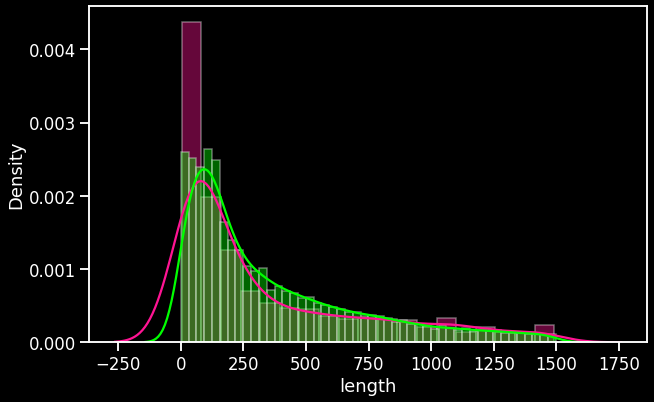

In [60]:
#Length Distribution Plot
sns.distplot(df2["length"].loc[df2.target==1], hist=True,color='deeppink')#Abusive
sns.distplot(df2["length"].loc[df2.target==0], hist=True,color='lime') #Non Abusive

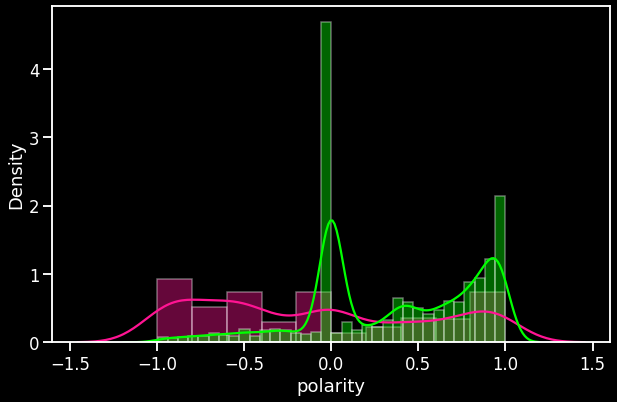

In [61]:
#Polarity Distribution Plot
sns.distplot(df2["polarity"].loc[df2.target==1], hist=True,color='deeppink')#Abusive
sns.distplot(df2["polarity"].loc[df2.target==0], hist=True,color='lime') #Non Abusive
#There are a large number of neutral statements
#It can be observed that the mean polarity of non_abusive emails is almost similar to the mean polarity of abusive emails. 
#Hence both the mean of absive and non_abusive emails shows 'neutral' polarity

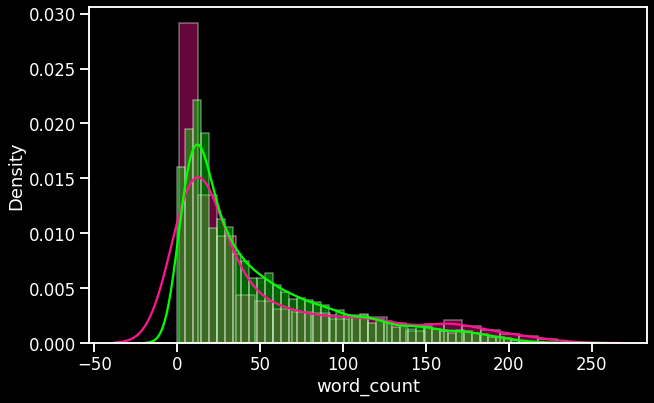

In [62]:
#WordCount Distribution Plot
sns.distplot(df2["word_count"].loc[df2.target==1], hist=True,color='deeppink')#Abusive
sns.distplot(df2["word_count"].loc[df2.target==0], hist=True,color='lime') #Non Abusive

# Vectorization

**CountVectorizer**

---



In [63]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=10000)

X_count = cv.fit_transform(df2["text"])

In [64]:
X_count.shape

(22108, 10000)

In [65]:
X_count

<22108x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 720244 stored elements in Compressed Sparse Row format>

In [66]:
y = df2.target
y.shape

(22108,)

The stratified sampling is designed to equally distribute some features in the next train and test sets.

**Train Test Split - Balancing the Data**

---



In [67]:
# split into train test sets
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, y, test_size=0.30, random_state=1, stratify=y)
#We will vectorize train and test seperately to avoid mixing

**TFIDF Transformer**

---





In [68]:
#Transform To TFIDF Vector
tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(X_train_count)
X_test = tfidf_transformer.fit_transform(X_test_count)
print(X_train.shape)
print(X_test.shape)

(15475, 10000)
(6633, 10000)


# **Machine Learning Models**

---



---



In [69]:
#Machine Learning Libraries

#For Linear SVC
from sklearn.svm import LinearSVC
#For Naive Bayes
from sklearn.naive_bayes import MultinomialNB
#For logistic Regression
from sklearn.linear_model import LogisticRegression
#For XGBoost Classifier
from xgboost import XGBClassifier
#For Perceptron
from sklearn.linear_model import Perceptron
#For Support Vector Machine
from sklearn.svm import SVC
#For ensemble Models
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

#For model validation
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

#To generate model report
from sklearn.metrics import plot_confusion_matrix,classification_report

#To save the model
import joblib


Model Validation - Stratified K-Fold:

In [70]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5) 
def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test,y_test)

1. **Logistic Regression**

In [71]:
## Logisitic Regression

LR = LogisticRegression()

#Parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [300, 200, 100, 10]

#ParametersGrid
lr_param_grid = dict(solver=solvers,penalty=penalty,C=c_values)

#GridSearchCV
gsLR = GridSearchCV(LR,param_grid = lr_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsLR.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [300, 200, 100, 10], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=1)

Best : 0.9766720516962843, using {'C': 300, 'penalty': 'l2', 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6205
           1       0.91      0.72      0.81       428

    accuracy                           0.98      6633
   macro avg       0.95      0.86      0.90      6633
weighted avg       0.98      0.98      0.98      6633



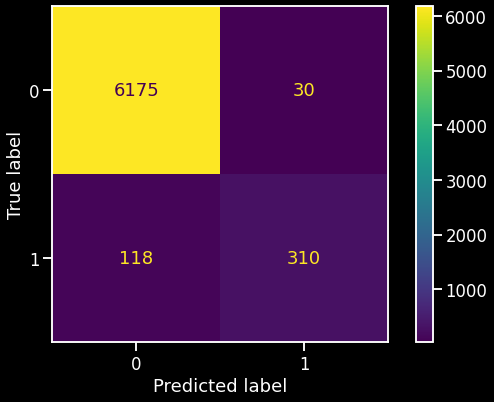

In [72]:
# Summarize the results
LR_best = gsLR.best_estimator_
print('Best : {}, using {}'.format(gsLR.best_score_,gsLR.best_params_))
report(gsLR)

In [73]:
# save the model to disk
with open('/content/mlmodels/1gsLR.sav', 'wb') as filename:
    joblib.dump(gsLR, filename)

2.**LinearSVC**

In [74]:
# Train the model
LSVC = LinearSVC()

#Parameters
class_weight=[None]
dual=[True]
tol=[1e-3,1e-2]
max_iter=[1e5]

#ParametersGrid
lsvc_param_grid = dict(class_weight=class_weight,dual=dual,tol=tol,max_iter=max_iter)

#GridSearchCV
gsLSVC = GridSearchCV(LSVC,param_grid = lsvc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsLSVC.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LinearSVC(), n_jobs=-1,
             param_grid={'class_weight': [None], 'dual': [True],
                         'max_iter': [100000.0], 'tol': [0.001, 0.01]},
             scoring='accuracy', verbose=1)

Best : 0.9766720516962843, using {'class_weight': None, 'dual': True, 'max_iter': 100000.0, 'tol': 0.001}
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6205
           1       0.94      0.72      0.81       428

    accuracy                           0.98      6633
   macro avg       0.96      0.86      0.90      6633
weighted avg       0.98      0.98      0.98      6633



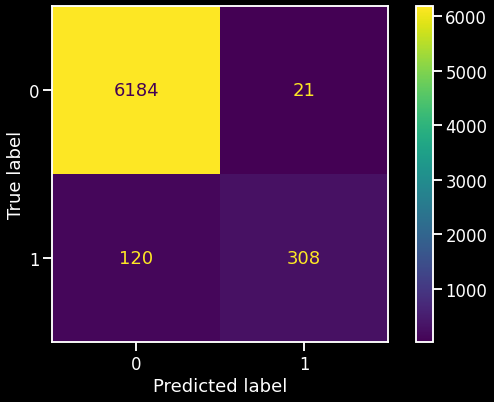

In [75]:
#Summarize the results
LSVC_best = gsLSVC.best_estimator_
print('Best : {}, using {}'.format(gsLSVC.best_score_,gsLSVC.best_params_))
report(gsLSVC)

In [76]:
# save the model to disk
with open('/content/mlmodels/2gsLSVC.sav', 'wb') as filename:
    joblib.dump(gsLSVC, filename)

3.**Multinomial Naive Bayes Classification**

In [77]:
# Train the model
MNB = MultinomialNB()

#Parameters
alpha=[1.0]
fit_prior=[True]

#ParametersGrid
mnb_param_grid = dict(alpha=alpha,fit_prior=fit_prior)

#GridSearchCV
gsMNB = GridSearchCV(MNB,param_grid = mnb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsMNB.fit(X_train,y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [1.0], 'fit_prior': [True]},
             scoring='accuracy', verbose=1)

Best : 0.9492084006462035, using {'alpha': 1.0, 'fit_prior': True}
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      6205
           1       0.92      0.30      0.45       428

    accuracy                           0.95      6633
   macro avg       0.94      0.65      0.71      6633
weighted avg       0.95      0.95      0.94      6633



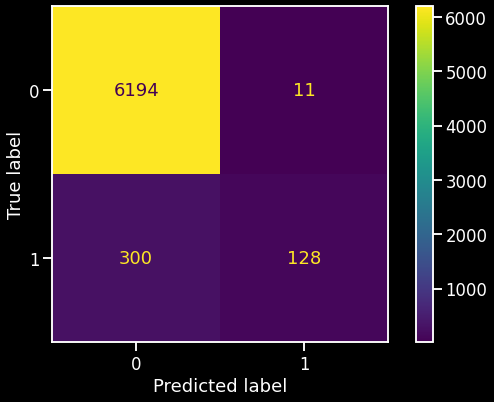

In [78]:
#Summarize the results
MNB_best = gsMNB.best_estimator_
print('Best : {}, using {}'.format(gsMNB.best_score_,gsMNB.best_params_))
report(gsMNB)
#Very poor recall values for 1

In [79]:
# save the model to disk
with open('/content/mlmodels/3gsMNB.sav', 'wb') as filename:
    joblib.dump(gsMNB, filename)

4.**RandomForest**

In [80]:
# Train the model
RFC = RandomForestClassifier()


#Parameters
rf_param_grid = {"max_depth": [15,20],
              "bootstrap": [False],
              "n_estimators" :[30,40,50],
              "criterion": ["gini"]}

#GridSearchCV
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsRFC.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [15, 20], 'n_estimators': [30, 40, 50]},
             scoring='accuracy', verbose=1)

Best : 0.9432633279483037, using {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'n_estimators': 40}
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      6205
           1       1.00      0.09      0.17       428

    accuracy                           0.94      6633
   macro avg       0.97      0.55      0.57      6633
weighted avg       0.94      0.94      0.92      6633



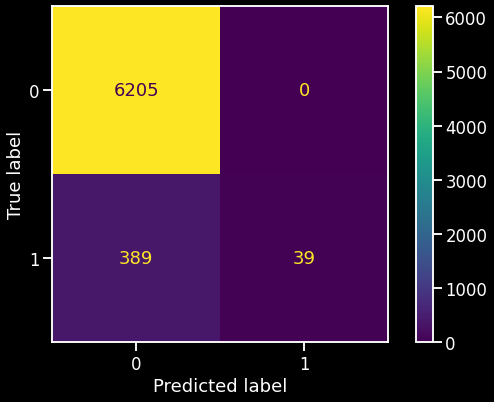

In [81]:
# Summarize the results
RFC_best = gsRFC.best_estimator_
print('Best : {}, using {}'.format(gsRFC.best_score_,gsRFC.best_params_))
report(gsRFC)
#Extremely Poor Recall values for 1

In [82]:
# save the model to disk
with open('/content/mlmodels/4gsRFC.sav', 'wb') as filename:
    joblib.dump(gsRFC, filename)

5.**XGBooster**


In [83]:
#Train the model
XGB = XGBClassifier()

#ParamGridSearch
xgb_param_grid = {"learning_rate"    : [0.075,0.1,0.2] ,
                  "max_depth"        : [17],
                  "gamma"            : [ 0.01]}

gsXGB = GridSearchCV(XGB,param_grid = xgb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsXGB.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'gamma': [0.01], 'learning_rate': [0.075, 0.1, 0.2],
                         'max_depth': [17]},
             scoring='accuracy', verbose=1)

Best : 0.9731825525040387, using {'gamma': 0.01, 'learning_rate': 0.2, 'max_depth': 17}
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6205
           1       0.92      0.64      0.76       428

    accuracy                           0.97      6633
   macro avg       0.95      0.82      0.87      6633
weighted avg       0.97      0.97      0.97      6633



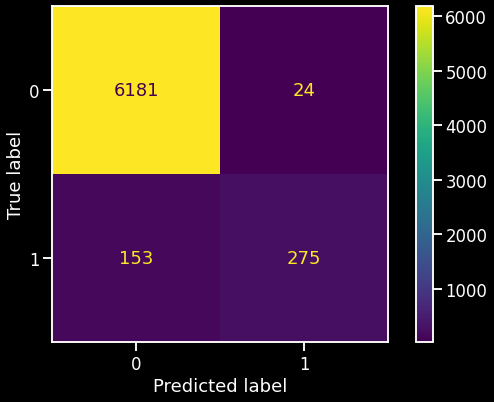

In [84]:
# Summarize the results
XGB_Best = gsXGB.best_estimator_
print('Best : {}, using {}'.format(gsXGB.best_score_,gsXGB.best_params_))
report(gsXGB)
#Average Recall values for 1

In [85]:
# save the model to disk
with open('/content/mlmodels/5gsXGB.sav', 'wb') as filename:
    joblib.dump(gsXGB, filename)

6. **Perceptron**

In [86]:
# Train the model
PPT = Perceptron()


#Parameters
ppt_param_grid = {"tol": [1e-5,1e-6],
              "class_weight": [None],
                  "early_stopping":[False]
                 }

#GridSearchCV
gsPPT = GridSearchCV(PPT,param_grid = ppt_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsPPT.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Perceptron(), n_jobs=-1,
             param_grid={'class_weight': [None], 'early_stopping': [False],
                         'tol': [1e-05, 1e-06]},
             scoring='accuracy', verbose=1)

Best : 0.9710500807754443, using {'class_weight': None, 'early_stopping': False, 'tol': 1e-05}
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6205
           1       0.79      0.77      0.78       428

    accuracy                           0.97      6633
   macro avg       0.89      0.88      0.88      6633
weighted avg       0.97      0.97      0.97      6633



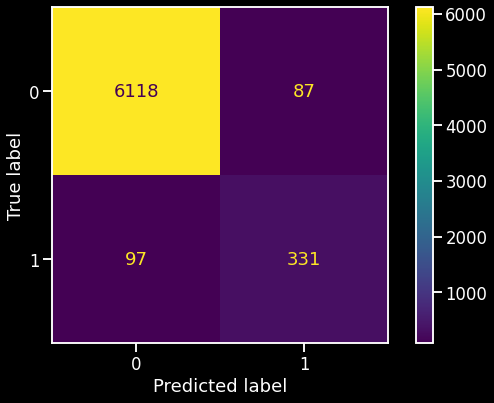

In [87]:
# Summarize the results
PPT_best = gsPPT.best_estimator_
print('Best : {}, using {}'.format(gsPPT.best_score_,gsPPT.best_params_))
report(gsPPT)
#Maybe an over fitted model. But average precison and recall for 1


In [88]:
# save the model to disk
with open('/content/mlmodels/6gsPPT.sav', 'wb') as filename:
    joblib.dump(gsPPT, filename)

7.**Support Vector Machine**

In [89]:
# Train the model
SVMC = SVC(probability=True)

# #Parameters
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.01],
                  'C': [150]}
#GridSearchCV
gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsSVMC.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [150], 'gamma': [0.01], 'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

Best : 0.9768012924071081, using {'C': 150, 'gamma': 0.01, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6205
           1       0.90      0.76      0.82       428

    accuracy                           0.98      6633
   macro avg       0.94      0.88      0.91      6633
weighted avg       0.98      0.98      0.98      6633



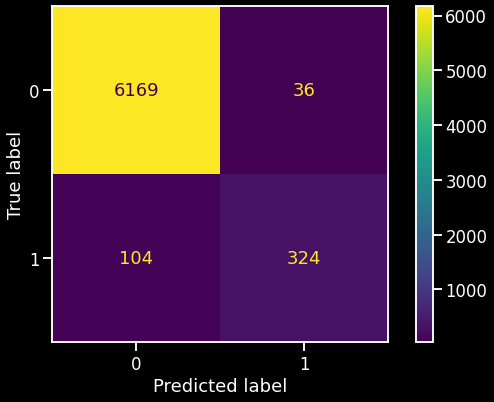

In [90]:
# Summarize the results
SVMC_best = gsSVMC.best_estimator_
print('Best : {}, using {}'.format(gsSVMC.best_score_,gsSVMC.best_params_))
report(gsSVMC)
#Good but a little low precision for 1

In [91]:
# save the model to disk
with open('/content/mlmodels/7gsSVMC.sav', 'wb') as filename:
    joblib.dump(gsSVMC, filename)

8.**Ensemble Models**

In [92]:
votingC = VotingClassifier(estimators=[('lr',LR_best),('xgb',XGB_Best),('rfc', RFC_best),('mnb', MNB_best),('lsvc',LSVC_best),('ppt',PPT_best),('svm',SVMC_best)], voting='hard', n_jobs=-1)
votingC = votingC.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6205
           1       0.94      0.71      0.81       428

    accuracy                           0.98      6633
   macro avg       0.96      0.85      0.90      6633
weighted avg       0.98      0.98      0.98      6633



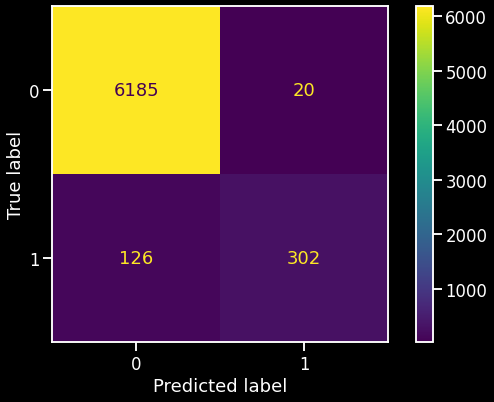

In [93]:
report(votingC) #POOR Recall for 1 and model seems overfitted

In [94]:
# save the model to disk
with open('/content/mlmodels/8Ensemble.sav', 'wb') as filename:
    joblib.dump(votingC, filename)

# **Plotting Learning Curves**

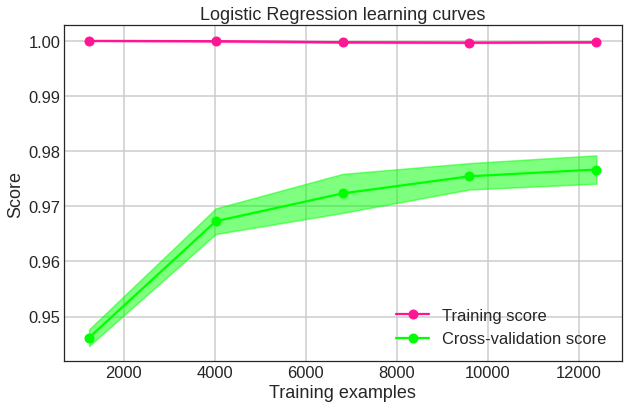

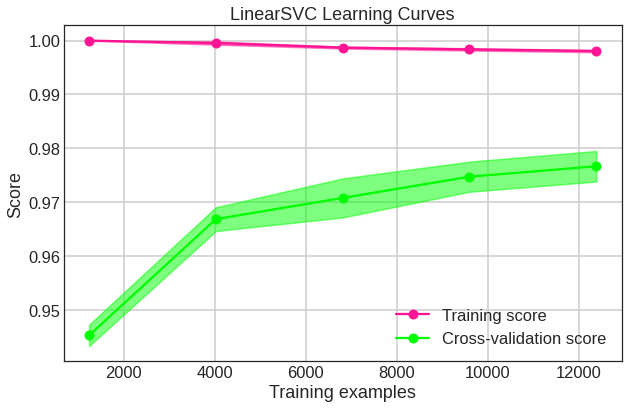

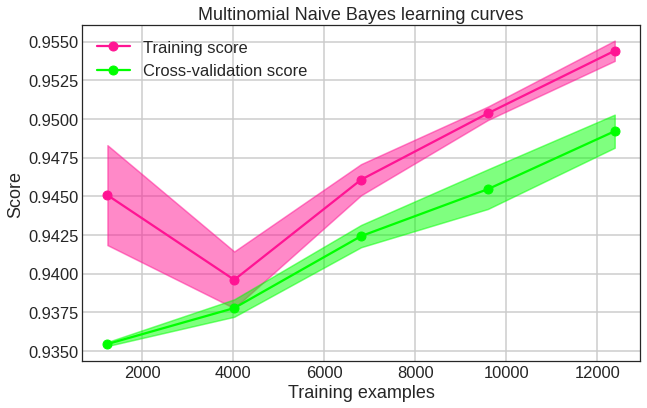

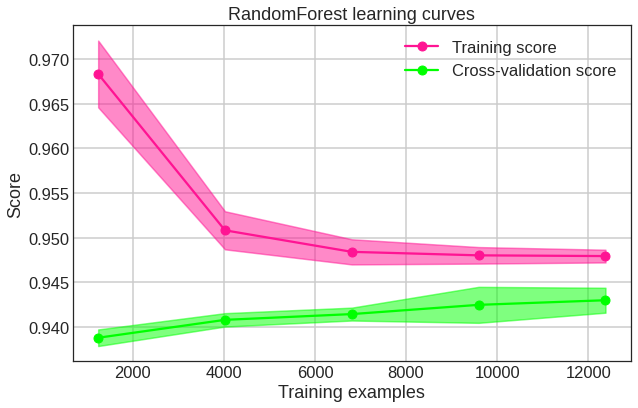

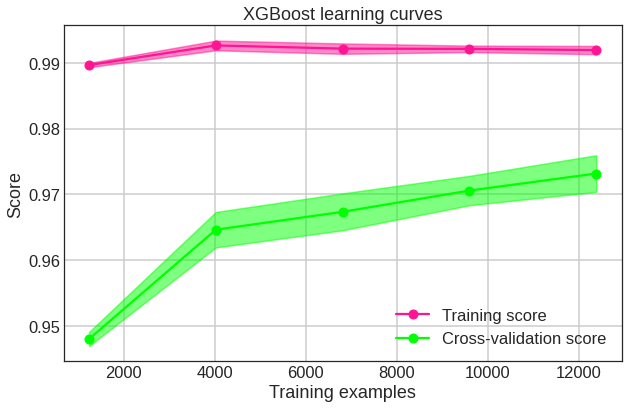

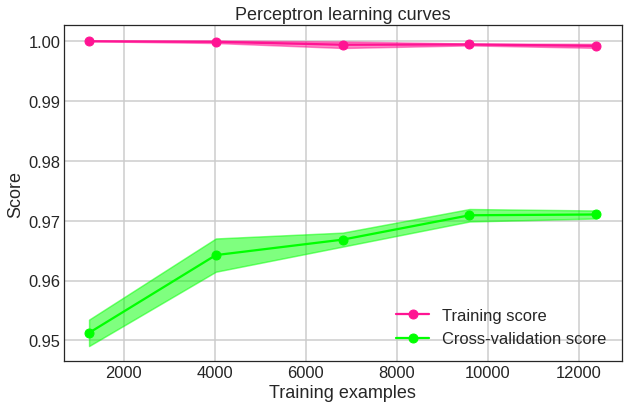

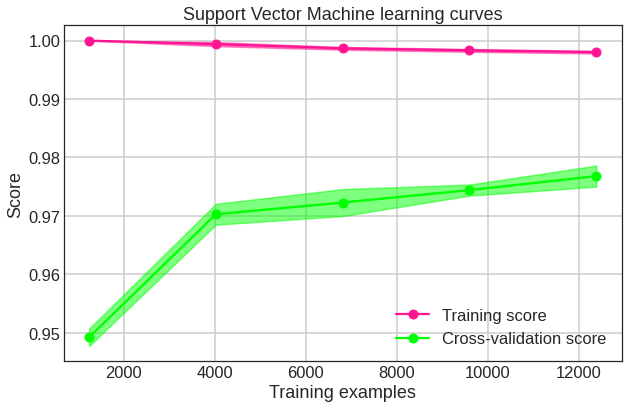

In [95]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
        #Setting White Theme
    sns.set(rc={'figure.figsize':(10,6.18)})
    sns.set(style="ticks", context="talk")
    plt.style.use("seaborn-white")
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.5,
                     color="deeppink")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.5, color="lime")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="deeppink",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="lime",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


g = plot_learning_curve(gsLR.best_estimator_,"Logistic Regression learning curves",X_train,y_train,cv=kfold)

g = plot_learning_curve(gsLSVC.best_estimator_,"LinearSVC Learning Curves",X_train,y_train,cv=kfold)

g = plot_learning_curve(gsMNB.best_estimator_,"Multinomial Naive Bayes learning curves",X_train,y_train,cv=kfold)

g = plot_learning_curve(gsRFC.best_estimator_,"RandomForest learning curves",X_train,y_train,cv=kfold)

g = plot_learning_curve(gsXGB.best_estimator_,"XGBoost learning curves",X_train,y_train,cv=kfold)

g = plot_learning_curve(gsPPT.best_estimator_,"Perceptron learning curves",X_train,y_train,cv=kfold)

g = plot_learning_curve(gsSVMC.best_estimator_,"Support Vector Machine learning curves",X_train,y_train,cv=kfold)


# Streamlit Service

In [96]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 65.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 108.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 10.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [97]:
!streamlit run Crosscheck.py & npx localtunnel --port 8501

[##................] | loadDep:strip-ansi: sill resolveWithNewModule strip-ansi


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.91.12.30:8501

npx: installed 22 in 3.562s
your url is: https://wise-rats-design-34-91-12-30.loca.lt
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_d